In [216]:
!pip install xgboost


In [217]:
!pip install --upgrade scikit-learn


In [218]:
!pip install pandas


In [219]:
# Import necessary libraries

# For data Analysis
import pandas as pd
import numpy as np

In [220]:
# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
# Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [222]:
# Classifier Libraries
import sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [223]:
# !pip install xgboost
from xgboost import XGBClassifier  # Corrected capitalization
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [224]:
# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)


In [226]:
import warnings
warnings.filterwarnings("ignore")

In [227]:
# Load the data set
df = pd.read_csv(r"C:\Users\renef\Downloads\heart - heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [228]:
# For better understanding and flow of analysis i will rename some of the account
df.columns = [
    "age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol",
    "fasting_blood_sugar", "rest_ecg", "max_heart_rate_achieved",
    "exercise_induced_angina", "st_depression", "st_slope",
    "num_major_vessels", "thalassemia", "target"
]
df.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [229]:
# Data verification - Data type, number of features and rows, missing data, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [230]:
# Statistical Analysis of the data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


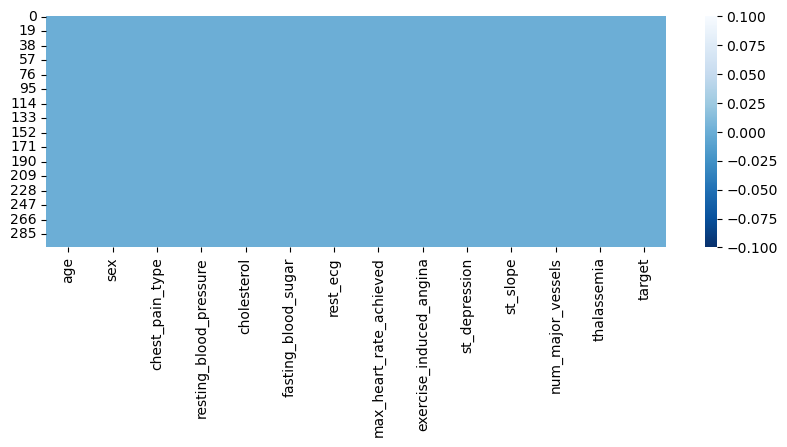

In [231]:
#Check for missing values
print(df.isnull().sum())

#Visualizing the missing data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

***Exploratory Data Analysis***

***Univariate Analysis***

In [234]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

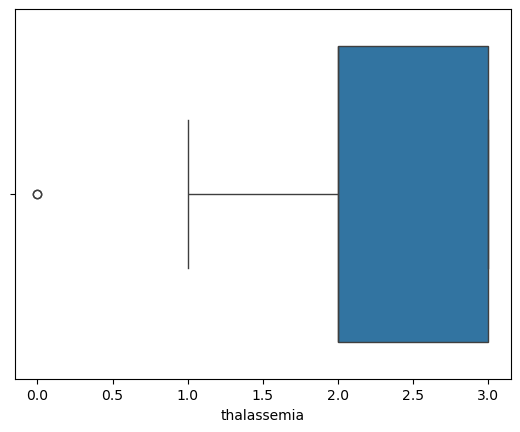

In [235]:
# Check for outliers
sns.boxplot(x=df["thalassemia"]);

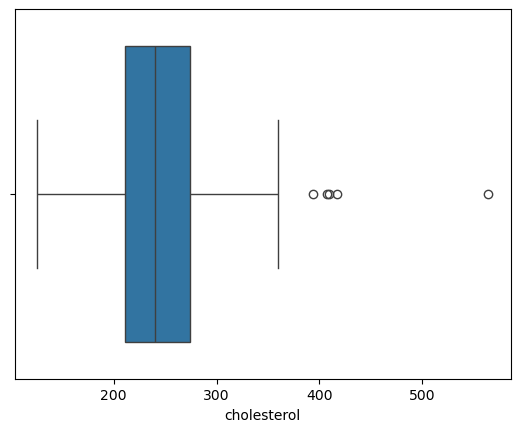

In [236]:
# Check for outliers
sns.boxplot(x=df["cholesterol"]);

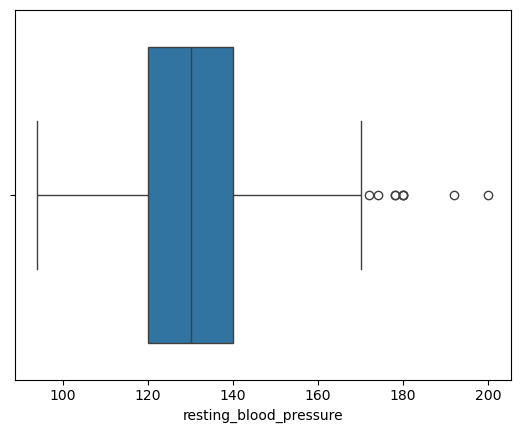

In [238]:
# Check for outliers
sns.boxplot(x=df["resting_blood_pressure"]);

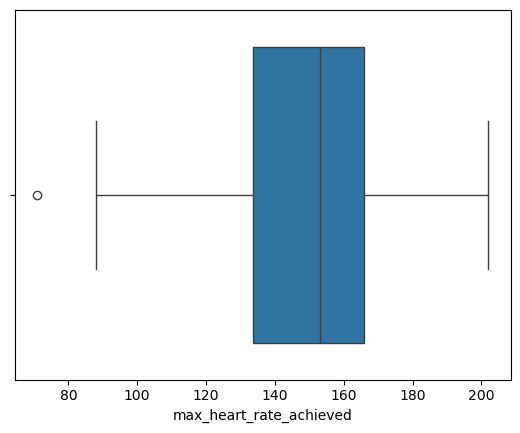

In [239]:
# Check for outliers
sns.boxplot(x=df["max_heart_rate_achieved"]);

In [397]:
#Data Visualization
#Age_bracket
def age_bracket(age):
    if age <= 35:
        return "youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "old Adult(<=65)"
    else:
        return "Elderly(>65)"
df["age_bracket"] = df["age"].apply(age_bracket)

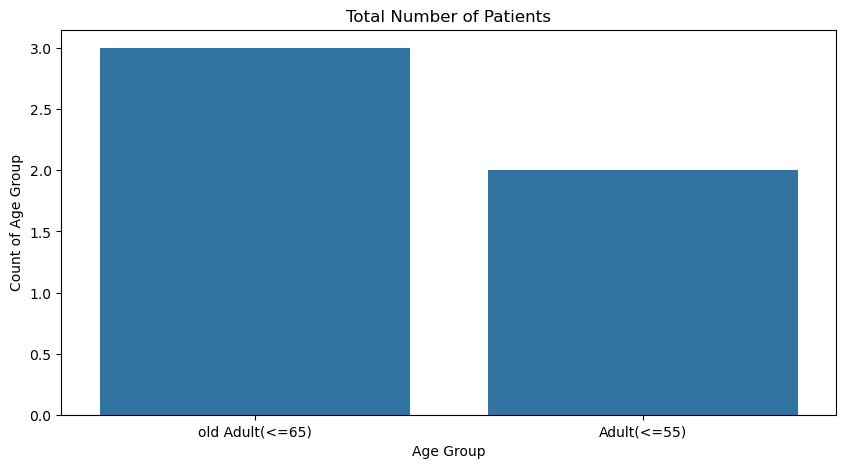

In [399]:
#Investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x="age_bracket", data=df)
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients");

In [405]:
#Data Visualization
#sex
def gender(sex):
    if sex ==1:
        return "Male"
    else:
        return "Female"

df["gender"] = df["sex"].apply(gender)
        


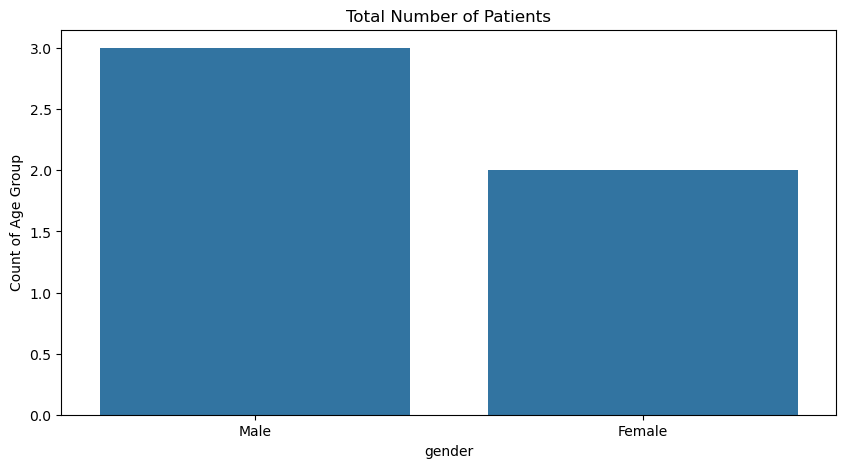

In [409]:
#Investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x="gender", data=df)
plt.xlabel("gender")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients");

In [411]:
# Data Visualization
#chest pain type(1:typical angina, 2: atypical angina, 3:non-anginal pain, 4: asymptomatic)
def chest_pain(cp):
    if cp ==1:
        return "typical angina"
    elif cp== 2:
        return "atypical angina"
    elif cp== 3:
        return "non-anginal pain"
    else:
        return "asymptomatic"
df["cp_cat"] = df["chest_pain_type"].apply(chest_pain)

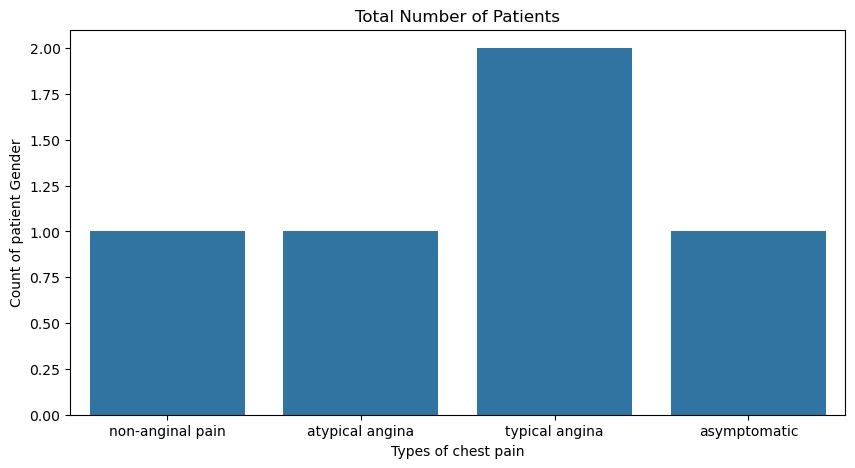

In [413]:
#Investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x="cp_cat", data=df)
plt.xlabel("Types of chest pain")
plt.ylabel("Count of patient Gender")
plt.title("Total Number of Patients");

In [415]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,old Adult(<=65),Male,non-anginal pain,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,old Adult(<=65),Male,typical angina,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,old Adult(<=65),Female,asymptomatic,1


In [507]:
#Data Visualization
#target - have disease or not (1=yes,0=no)

def label(tg):
    if tg ==1:
        return "yes"
    else:
        return "No"

df["label"] = df["target"].apply(label)
        


In [509]:
#Total patient in each category
print(df["label"].value_counts())

label
yes    5
Name: count, dtype: int64


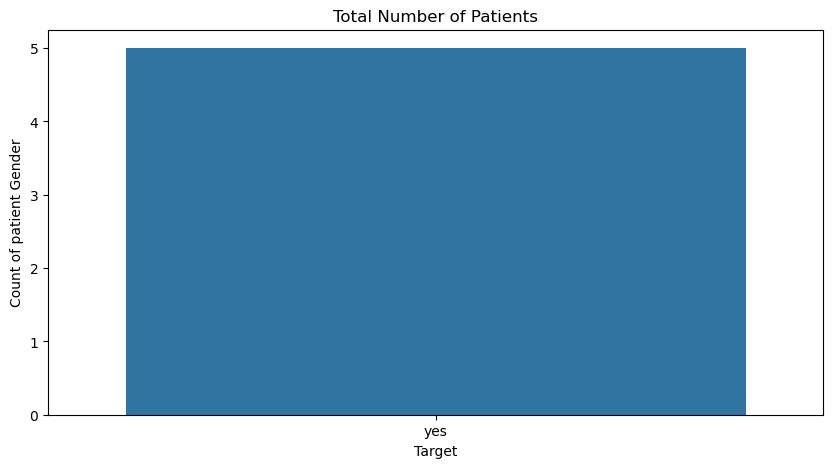

In [511]:
#Investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x="label", data=df)
plt.xlabel("Target")
plt.ylabel("Count of patient Gender")
plt.title("Total Number of Patients");

***Bivariate Analysis***

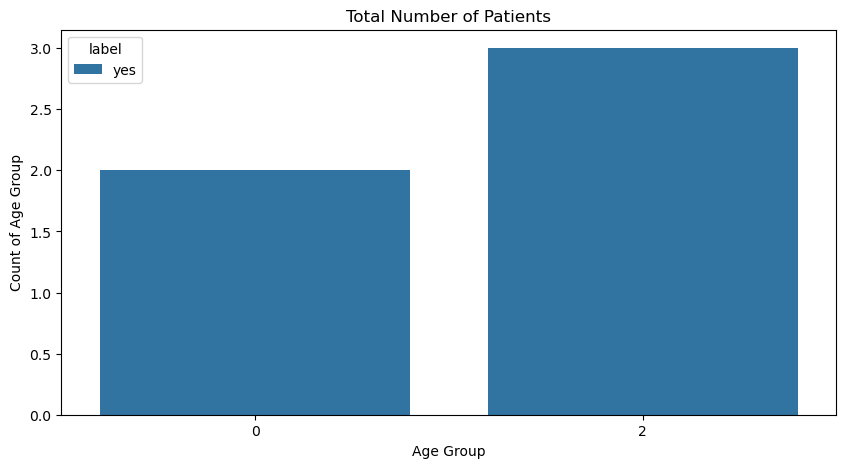

In [514]:
#Investigating the age group of patients by the target features
plt.figure(figsize = (10,5))
sns.countplot(x="age_bracket", data=df, hue="label")
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients");

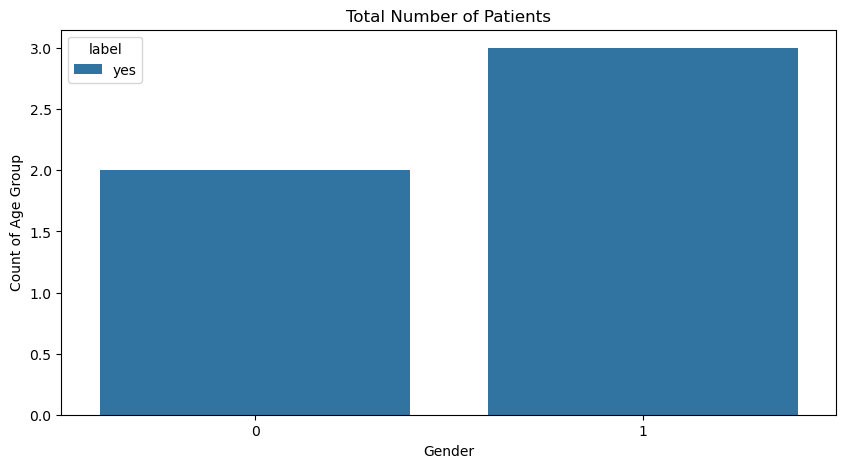

In [516]:
#Investigating the gender of patients by the target features
plt.figure(figsize = (10,5))
sns.countplot(x="gender", data=df, hue="label")
plt.xlabel("Gender")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients");

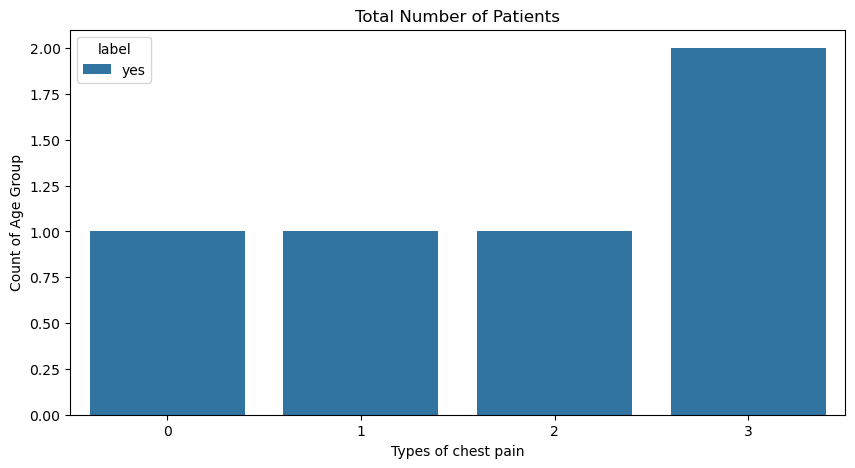

In [518]:
#Investigating the gender of patients by the target features
plt.figure(figsize = (10,5))
sns.countplot(x="cp_cat", data=df, hue="label")
plt.xlabel("Types of chest pain")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients");

***EXPLORATORY DATA ANALYSIS-MULTIVARIATE ANALYSIS***

In [521]:
print(df.dtypes)


age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
age_bracket                  int64
gender                       int64
cp_cat                       int64
label                       object
dtype: object


In [523]:
numeric_df = df.select_dtypes(include=[float, int])  # Select only numeric columns
corr_matrix = numeric_df.corr()


In [525]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include=[object]).columns:
    df[col] = LabelEncoder().fit_transform(df[col])
corr_matrix = df.corr()


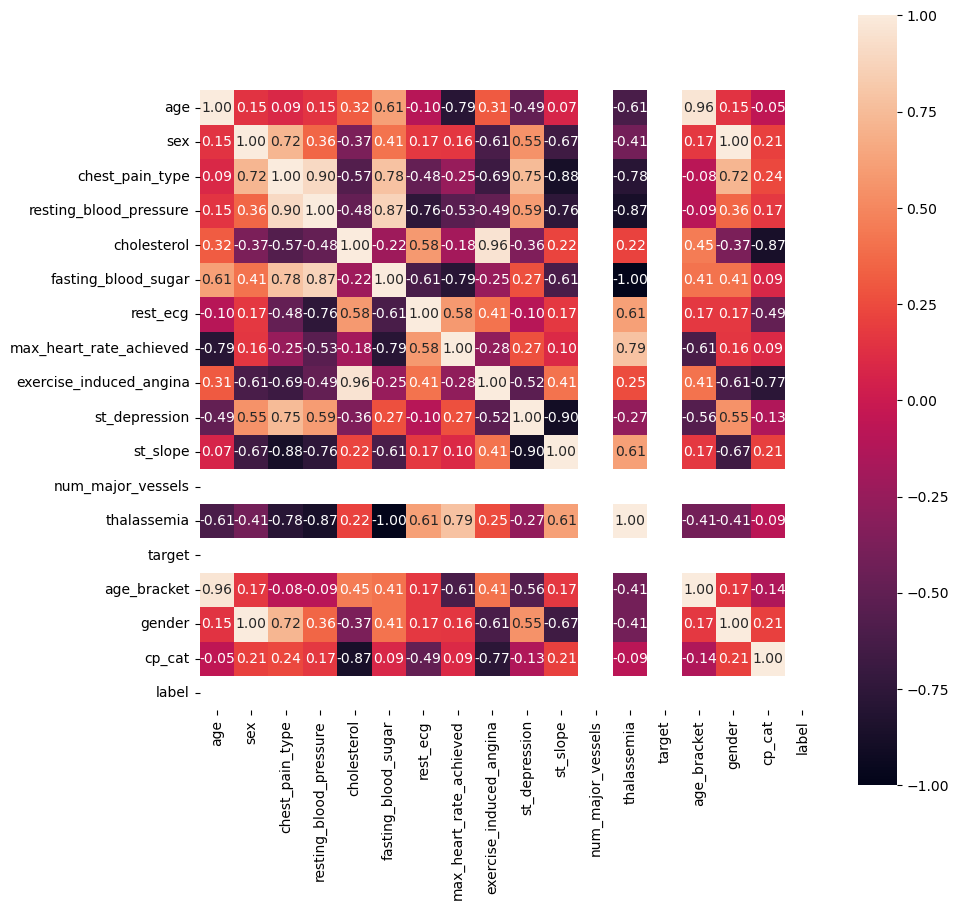

In [527]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10})
plt.show()


***FEATURE ENGINEERING?DATA PRE-PROCESSING***

In [290]:
import pandas as pd

In [444]:
# Data Visualization
#chest pain type(1:typical angina, 2: atypical angina, 3:non-anginal pain, 4: asymptomatic)
def chest_pain(cp):
    if cp ==1:
        return "typical angina"
    elif cp== 2:
        return "atypical angina"
    elif cp== 3:
        return "non-anginal pain"
    else:
        return "asymptomatic"
df["cp_cat"] = df["chest_pain_type"].apply(chest_pain)

In [496]:
#Data Visualization
#target - have disease or not (1=yes,0=no)

def label(tg):
    if tg ==1:
        return "yes"
    else:
        return "No"

df["label"] = df["target"].apply(label)
        


In [498]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2,1,2,yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1,1,yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,0,3,yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2,1,3,yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2,0,0,yes


In [500]:
import pandas as pd

# Define the original DataFrame

columns = [
    "age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol",
    "fasting_blood_sugar", "rest_ecg", "max_heart_rate_achieved",
    "exercise_induced_angina", "st_depression", "st_slope",
    "num_major_vessels", "thalassemia", "target", "age_bracket", "gender",
    "cp_cat", "label",
]
df = pd.DataFrame(data, columns=columns)

# Create df1 without the excluded columns
df1 = df[[
    "age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol",
    "fasting_blood_sugar", "rest_ecg", "max_heart_rate_achieved",
    "exercise_induced_angina", "st_depression", "st_slope",
    "num_major_vessels", "thalassemia",
]]

# Extract the target column
label = df[["target"]]

# Display the first few rows of df1
df1.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [502]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

***MACHINE LEARNING***

In [505]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the data using .values.reshape(-1, 1)
df1["Scaled_RBP"] = scaler.fit_transform(df1["resting_blood_pressure"].values.reshape(-1, 1))
df1["Scaled_chol"] = scaler.fit_transform(df1["cholesterol"].values.reshape(-1, 1))
df1["Scaled_thal"] = scaler.fit_transform(df1["thalassemia"].values.reshape(-1, 1))
df1["Scaled_max_heart_rate"] = scaler.fit_transform(df1["max_heart_rate_achieved"].values.reshape(-1, 1))


In [456]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1.0,0.193333,0.0,0.000000
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0.4,0.306667,1.0,1.000000
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0.4,0.000000,1.0,0.594595
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0.0,0.213333,1.0,0.756757
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0.0,1.000000,1.0,0.351351


In [492]:
df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,1.0,0.193333,0.0,0.000000
1,37,1,2,0,1,0,3.5,0,0,0.4,0.306667,1.0,1.000000
2,41,0,1,0,0,0,1.4,2,0,0.4,0.000000,1.0,0.594595
3,56,1,1,0,1,0,0.8,2,0,0.0,0.213333,1.0,0.756757
4,57,0,0,0,1,1,0.6,2,0,0.0,1.000000,1.0,0.351351


In [535]:
# Load the data set
df = pd.read_csv(r"C:\Users\renef\Downloads\heart - heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [537]:
# Check the distribution of the target variable
target_distribution = df['target'].value_counts()
target_distribution


target
1    165
0    138
Name: count, dtype: int64

In [391]:
#split the dataset into training and testing set - X= questions, y = Answers
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2,random_state=42)

In [539]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Calculate and print performance metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred),
    "AUC-ROC": roc_auc_score(y_test, y_pred)
}

metrics


{'Accuracy': 0.8852459016393442,
 'Precision': 0.8787878787878788,
 'Recall': 0.90625,
 'F1-score': 0.8923076923076924,
 'AUC-ROC': 0.8841594827586207}

In [543]:
y_pred


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [545]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

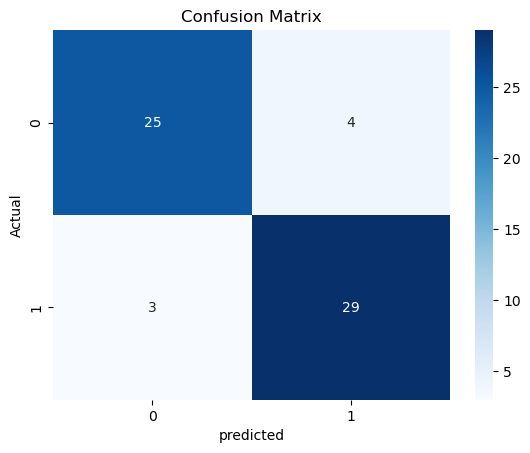

In [549]:
#Create a confusion matrix
lcm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
          


In [551]:
# Model Building

# Random Forest Classifier

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Fit the model
rfc.fit(X_train, y_train)

# Predict on the test set
rfy_pred = rfc.predict(X_test)

# Print performance metrics
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))


Random Forest Classifier
Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1-score: 0.84375
AUC-ROC: 0.8356681034482758


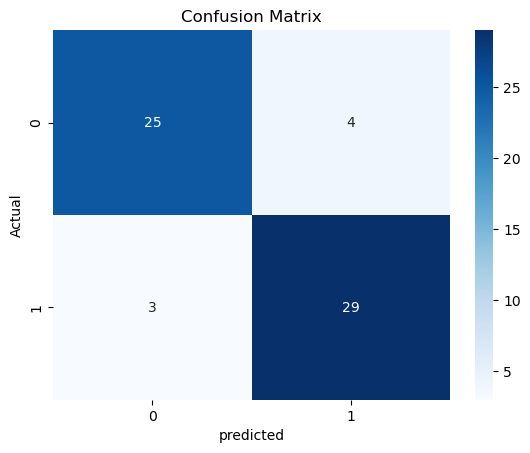

In [553]:
#Create a confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
          

In [559]:
# 8 Machine learning Algorithms will be applied to the dataset
# List of classifiers with their names
classifiers = [
    [XGBClassifier(), 'XGB Classifier'],
    [RandomForestClassifier(), 'Random Forest '],
    [KNeighborsClassifier(), 'K-Nearest Neighbours'],
    [SGDClassifier(), 'SGD Classifier'],
    [SVC(), 'SVC'],
    [GaussianNB(), 'Naive Bayes'],
    [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
    [LogisticRegression(), 'Logistic Regression']
]


In [563]:
acc_list ={}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]

    pred = model.predict(X_test)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + "%"])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + "%"])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + "%"])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) +"%"])

    if model_name != classifiers[-1][1]:
        print(" ")


In [571]:
print("Accuracy score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,83.61%,68.85%,65.57%,70.49%,86.89%,75.41%,88.52%


In [573]:
print("Precision")
s2 = pd.DataFrame(acc_list)
s2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,83.61%,68.85%,65.57%,70.49%,86.89%,75.41%,88.52%


In [575]:
print("Recall")
s3 = pd.DataFrame(acc_list)
s3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,83.61%,68.85%,65.57%,70.49%,86.89%,75.41%,88.52%


In [577]:
print("ROC Score")
s4 = pd.DataFrame(acc_list)
s4.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,83.61%,68.85%,65.57%,70.49%,86.89%,75.41%,88.52%


in conclusion
